In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
data = load_breast_cancer()

# data

In [ ]:
X = data.data

y = data.target

In [ ]:
pd.DataFrame(data.data, columns=data.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
y.shape

(569,)

In [ ]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y.shape

(569, 1)

In [ ]:
# sigmoid, RelU, leaky RelU
initializer = tf.keras.initializers.GlorotUniform(seed=42)
def build_model(activation, activation_name):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(30, input_dim = 30, activation = activation, kernel_initializer = initializer))
  for _ in range(8):
    model.add(tf.keras.layers.Dense(30, input_dim = 30, activation = activation, kernel_initializer = initializer))
  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer = initializer))

  model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_test, y_test))

  loss_after, accuracy_after = model.evaluate(X_test, y_test, verbose=0)

  with tf.GradientTape() as tape:
    predictions = model(X_train)
    loss = tf.keras.losses.binary_crossentropy(y_train, predictions)
  grads = tape.gradient(loss, model.trainable_weights)
  grad_norms = [np.linalg.norm(grad) for grad in grads if grad is not None]

  print(f"Loss with {activation_name} after training: {loss_after:.6f}")
  print(f"Accuracy with {activation_name} after training: {accuracy_after:.6f}")
  for i, norm in enumerate(grad_norms, 1):
      print(f"Gradient Norm of Layer {i}: {norm:.6f}")

  return history, grad_norms

In [ ]:
histories = {}
grad_norms = {}

histories['sigmoid'], grad_norms['sigmoid']=build_model('sigmoid', 'sigmoid')
histories['ReLU'], grad_norms['ReLU']=build_model('ReLU', 'ReLU')
histories['Leaky ReLU'], grad_norms['Leaky ReLU'] = build_model(tf.keras.layers.LeakyReLU(alpha=0.01), 'Leaky ReLU')

Loss with sigmoid after training: 0.662834
Accuracy with sigmoid after training: 0.622807
Gradient Norm of Layer 1: 0.000907
Gradient Norm of Layer 2: 0.000020
Gradient Norm of Layer 3: 0.001207
Gradient Norm of Layer 4: 0.000056
Gradient Norm of Layer 5: 0.001028
Gradient Norm of Layer 6: 0.000070
Gradient Norm of Layer 7: 0.001615
Gradient Norm of Layer 8: 0.000297
Gradient Norm of Layer 9: 0.004325
Gradient Norm of Layer 10: 0.001412
Gradient Norm of Layer 11: 0.020594
Gradient Norm of Layer 12: 0.007341
Gradient Norm of Layer 13: 0.091517
Gradient Norm of Layer 14: 0.032261
Gradient Norm of Layer 15: 0.418178
Gradient Norm of Layer 16: 0.146818
Gradient Norm of Layer 17: 1.121804
Gradient Norm of Layer 18: 0.394439
Gradient Norm of Layer 19: 3.664187
Gradient Norm of Layer 20: 1.318083
Loss with ReLU after training: 0.157816
Accuracy with ReLU after training: 0.964912
Gradient Norm of Layer 1: 2.408090
Gradient Norm of Layer 2: 0.689907
Gradient Norm of Layer 3: 1.706837
Gradient N

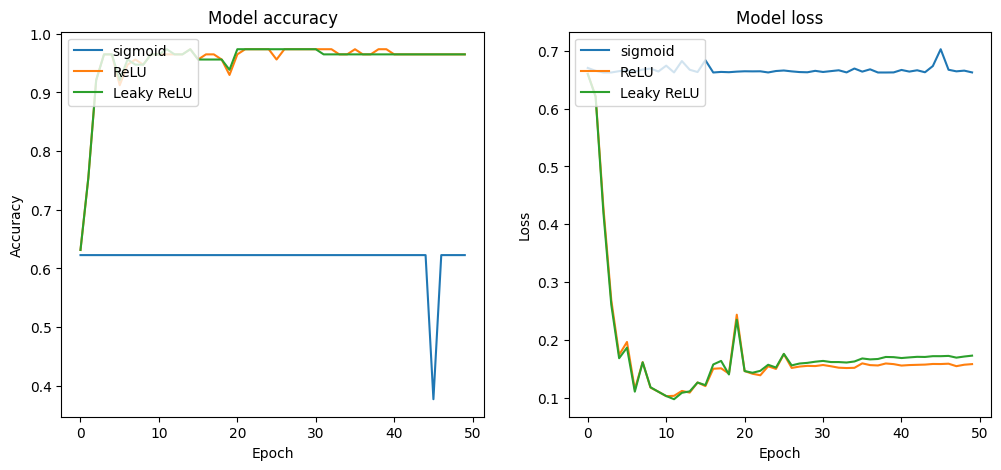

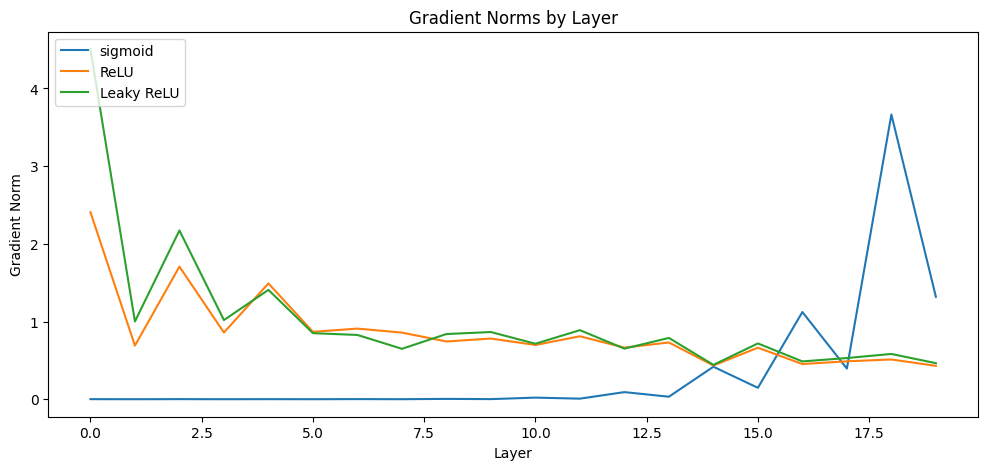

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for key in histories:
    plt.plot(histories[key].history['val_accuracy'], label=f'{key}')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
for key in histories:
    plt.plot(histories[key].history['val_loss'], label=f'{key}')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


plt.figure(figsize=(12, 5))
for key in grad_norms:
    plt.plot(grad_norms[key], label=f'{key}')
plt.title('Gradient Norms by Layer')
plt.ylabel('Gradient Norm')
plt.xlabel('Layer')
plt.legend(loc='upper left')
plt.show()